<a href="https://colab.research.google.com/github/nebojsa-bozanic/cider/blob/colab/Cider_ICLR2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Colab reproduction/presentation of ICLR2023 paper: "How to Exploit Hyperspherical Embeddings for Out-of-Distribution Detection?"

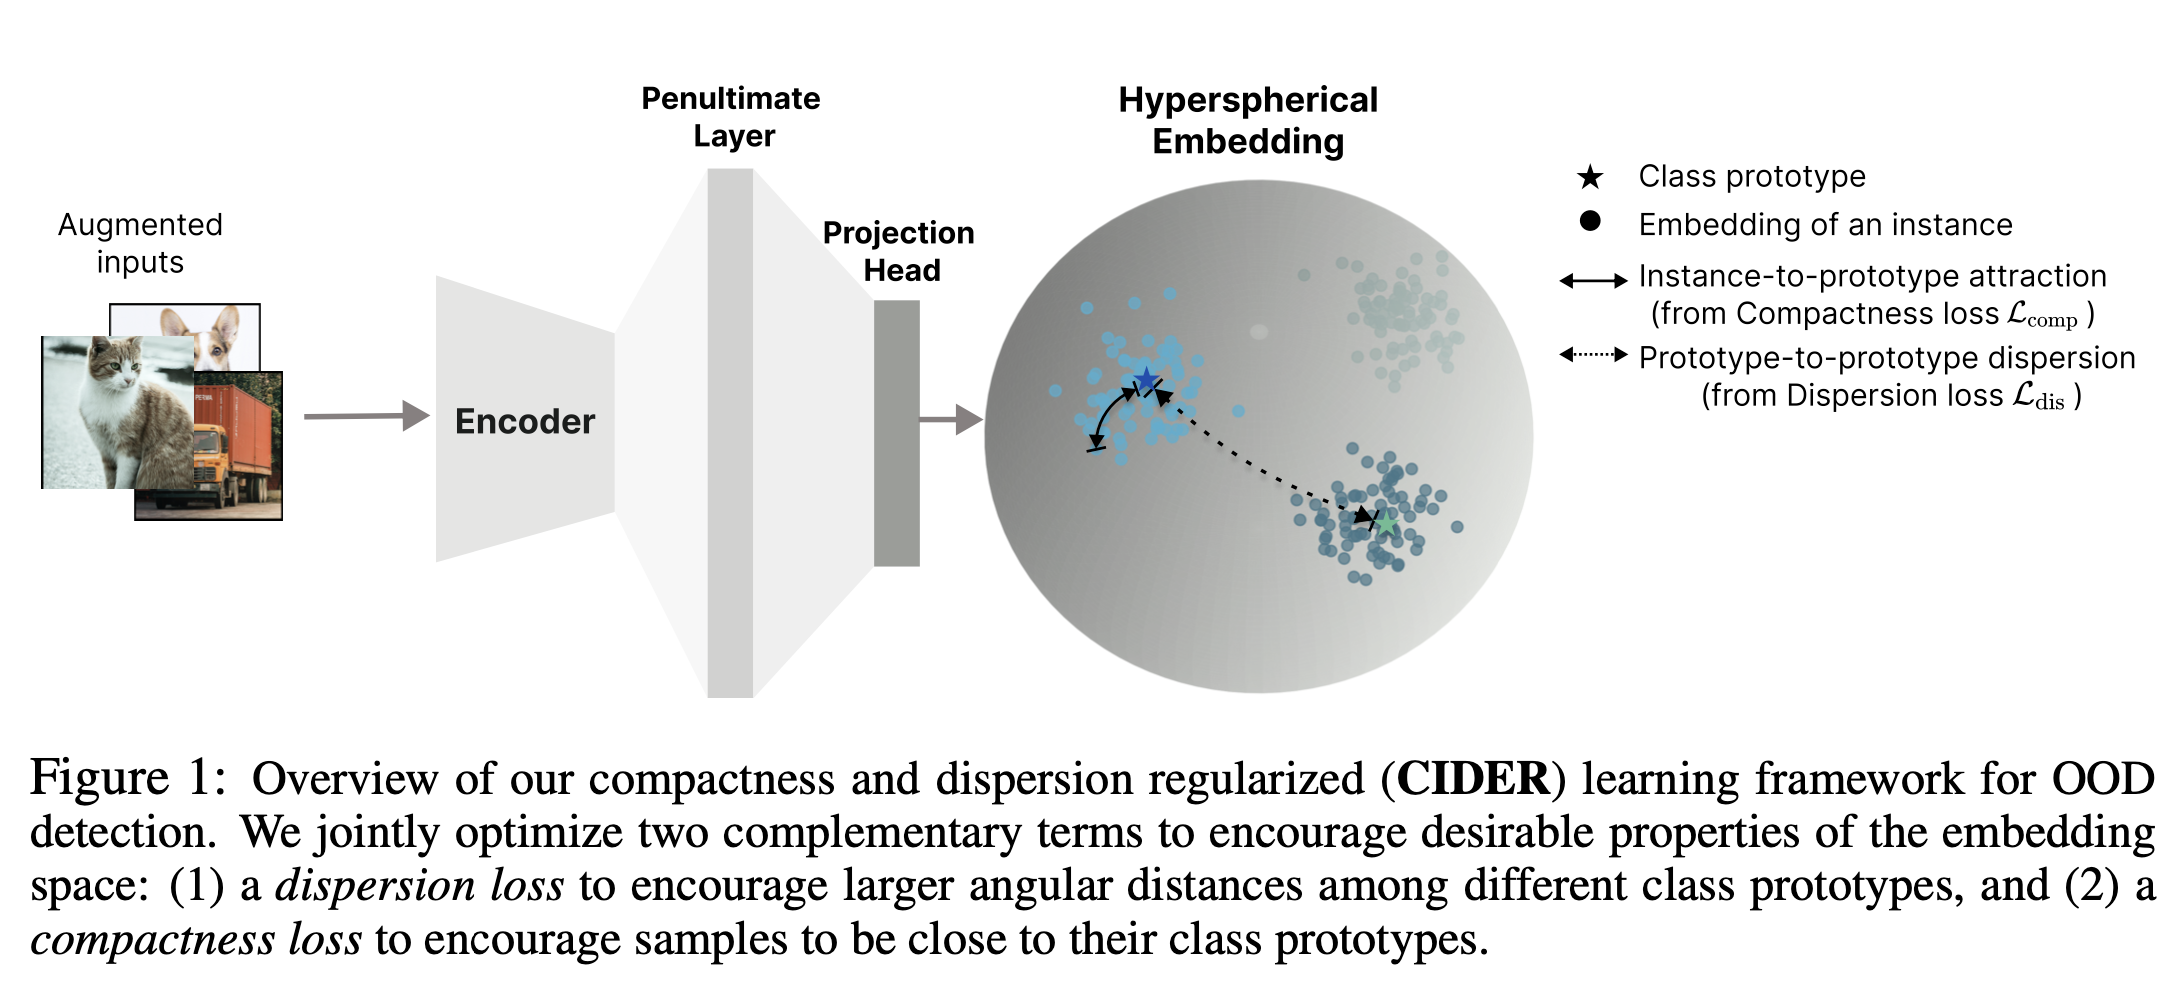

In [ ]:
!git clone https://github.com/deeplearning-wisc/cider.git

## Data Preparation

In [ ]:
!mkdir /content/cider/datasets/
!mkdir /content/cider/datasets/small_OOD_dataset
!mkdir /content/cider/datasets/small_OOD_dataset/svhn
!mkdir /content/cider/datasets/small_OOD_dataset/places365
!mkdir /content/cider/datasets/small_OOD_dataset/places365/test_subset
!mkdir /content/cider/checkpoints/
!mkdir /content/cider/checkpoints/CIFAR-10/
!mkdir /content/cider/checkpoints/CIFAR-10/ckpt_c10

In [ ]:
%cd /content/cider/datasets/small_OOD_dataset
!wget https://www.dropbox.com/s/fhtsw1m3qxlwj6h/LSUN.tar.gz
!tar -xvzf LSUN.tar.gz

In [ ]:
!wget https://www.dropbox.com/s/moqh2wh8696c3yl/LSUN_resize.tar.gz
!tar -xvzf LSUN_resize.tar.gz

In [ ]:
!wget https://www.dropbox.com/s/ssz7qxfqae0cca5/iSUN.tar.gz
!tar -xvzf iSUN.tar.gz

Super slow... (Depends on the server speed which sometimes can be xtremely slow)

In [ ]:
!wget https://www.robots.ox.ac.uk/~vgg/data/dtd/download/dtd-r1.0.1.tar.gz
!tar -xvzf dtd-r1.0.1.tar.gz

In [ ]:
%cd /content/cider/datasets/small_OOD_dataset/places365/test_subset/
!wget http://data.csail.mit.edu/places/places365/test_256.tar
!tar -xvf test_256.tar

In [ ]:
%cd /content/cider/datasets/small_OOD_dataset/svhn
!wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat
!tar -xvzf dtd-r1.0.1.tar.gz
%cd /content/cider/
!python utils/select_svhn_data.py

## Requirements

In [ ]:
!pip install faiss-gpu

## Models

In [ ]:
!curl -L -C - -o '/content/cider/checkpoints/CIFAR-10/ckpt_c10/checkpoint_500.pth.tar' 'https://drive.google.com/u/0/uc?id=1w_WnXF_XJAmUWZgaO6NzqPhRLcO89rhb&export=download&confirm=t'

## Evaluation

### Cifar10

In [ ]:
%cd /content/cider/
!sh scripts/eval_ckpt_cifar10.sh ckpt_c10 #for CIFAR-10

/content/cider
Namespace(in_dataset='CIFAR-10', batch_size=512, epoch='500', gpu=0, loss='cider', name='ckpt_c10', id_loc='datasets/CIFAR10', ood_loc='datasets/small_OOD_dataset', score='knn', K=100, subset=False, multiplier=1, model='resnet18', embedding_dim=512, feat_dim=128, head='mlp', out_as_pos=False, T=1000)
Files already downloaded and verified
Number of model parameters: 11502282
100% 20/20 [00:02<00:00,  7.25it/s]
preprocessing ID finished
Evaluting OOD dataset SVHN
 95% 19/20 [00:01<00:00, 10.65it/s]
preprocessing OOD SVHN finished
[0.41622543 0.07154357 0.11945868] [1.3931179 1.3658437 1.5260057]
in score samples (random sampled): [0.41622543 0.07154357 0.11945868], out score samples: [1.3931179 1.3658437 1.5260057]
FPR95:			4.46	+/- 0.00
AUROC: 			99.17	+/- 0.00
AUPR:  			99.11	+/- 0.00
Evaluting OOD dataset places365
 95% 19/20 [00:08<00:00,  2.20it/s]
preprocessing OOD places365 finished
[0.41622543 0.07154357 0.11945868] [0.91724896 0.9022622  0.21752167]
in score sampl

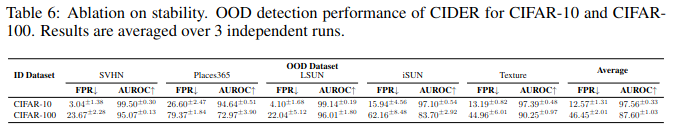

Results are in line with the table6 presented in the paper

### Cifar100

In [ ]:
!mkdir /content/cider/datasets/
!mkdir /content/cider/datasets/ImageNet_OOD_dataset/
!mkdir /content/cider/checkpoints/
!mkdir /content/cider/checkpoints/CIFAR-100
!mkdir /content/cider/checkpoints/CIFAR-100/ckpt_c100

In [ ]:
%cd /content/cider/datasets/ImageNet_OOD_dataset/

/content/cider/datasets/ImageNet_OOD_dataset


In [ ]:
!wget http://pages.cs.wisc.edu/~huangrui/imagenet_ood_dataset/iNaturalist.tar.gz

In [ ]:
!tar -xvzf iNaturalist.tar.gz

In [ ]:
!wget http://pages.cs.wisc.edu/~huangrui/imagenet_ood_dataset/SUN.tar.gz

In [ ]:
!tar -xvzf SUN.tar.gz

In [ ]:
!wget http://pages.cs.wisc.edu/~huangrui/imagenet_ood_dataset/Places.tar.gz

In [ ]:
!tar -xvzf Places.tar.gz

In [ ]:
!curl -L -C - -o '/content/cider/checkpoints/CIFAR-100/ckpt_c100/checkpoint_500.pth.tar' 'https://drive.google.com/u/0/uc?id=1uH9WCu_Rx9Z9Xq7PKW4M3ADThXIWrege&export=download&confirm=t'

In [ ]:
%cd /content/cider/
!sh scripts/eval_ckpt_cifar100.sh ckpt_c100 # for CIFAR-100

/content/cider
Namespace(in_dataset='CIFAR-100', batch_size=512, epoch='500', gpu=0, loss='cider', name='ckpt_c100', id_loc='datasets/CIFAR100', ood_loc='datasets/small_OOD_dataset', score='knn', K=300, subset=False, multiplier=1, model='resnet34', embedding_dim=512, feat_dim=128, head='mlp', out_as_pos=False, T=1000)
100% 169001437/169001437 [00:10<00:00, 16030511.00it/s]
Extracting datasets/CIFAR100/cifar-100-python.tar.gz to datasets/CIFAR100
Number of model parameters: 21656612
100% 98/98 [00:09<00:00, 10.67it/s]
100% 20/20 [00:02<00:00,  9.86it/s]
preprocessing ID finished
Evaluting OOD dataset SVHN
 95% 19/20 [00:01<00:00,  9.76it/s]
preprocessing OOD SVHN finished
[0.8606044 1.0146748 0.9631491] [1.1921992 1.2920157 0.9584688]
in score samples (random sampled): [0.8606044 1.0146748 0.9631491], out score samples: [1.1921992 1.2920157 0.9584688]
FPR95:			23.00	+/- 0.00
AUROC: 			95.17	+/- 0.00
AUPR:  			95.28	+/- 0.00
Evaluting OOD dataset places365
 95% 19/20 [00:14<00:00,  1.31i

Citation

```
@inproceedings{ming2023cider,
 title={How to Exploit Hyperspherical Embeddings for Out-of-Distribution Detection?},
 author={Yifei Ming and Yiyou Sun and Ousmane Dia and Yixuan Li},
 booktitle={The Eleventh International Conference on Learning Representations },
  year={2023},
  url={https://openreview.net/forum?id=aEFaE0W5pAd}
}

```

